In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
app = pd.read_csv("Credit Card Approval Dataset/application_record.csv")
cred = pd.read_csv("Credit Card Approval Dataset/credit_record.csv")
cred

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [20]:

cred['STATUS'].replace({'0': 0,'1': 0, 'C': 0, 'X' : 0, '2': 2,'3': 3,'4': 4,'5': 5}, inplace=True)
cred = cred.groupby('ID').sum()
cred.loc[cred['STATUS']>0,'STATUS']=1

cred.STATUS.value_counts()
cred

,MONTHS_BALANCE,STATUS
ID,,
5001711,-6,0
5001712,-171,0
5001713,-231,0
5001714,-105,0
5001715,-1770,0
...,...,...
5150482,-351,0
5150483,-153,0
5150484,-78,0


In [21]:
data = pd.merge(app, cred, on="ID")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-120,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-105,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-435,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-10,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-66,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-276,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-528,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-45,1


In [22]:
data['CODE_GENDER'] = data['CODE_GENDER'].replace({'F': 0,'M': 1})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace({'Y': 0,'N': 1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace({'Y': 0,'N': 1})
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-120,0
1,5008805,1,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-105,0
2,5008806,1,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-435,0
3,5008808,0,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-10,0
4,5008809,0,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,0,0,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-66,1
36453,5149834,0,1,0,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-276,1
36454,5149838,0,1,0,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-528,1
36455,5150049,0,1,0,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-45,1


In [23]:
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].replace({'Lower secondary':0, 'Secondary / secondary special':1, 'Academic degree':2,'Incomplete higher':3,'Higher education':4})

data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].replace({'Co-op apartment':0, 'With parents':0,'Rented apartment':1, 'Office apartment':2,'Municipal apartment':2,'House / apartment':3})

data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].replace({'UN_EMPLOYEED':0, 'Cleaning staff':1,  'Waiters/barmen staff':2,'Waiters/barmen staff':2,'Secretaries':2,'Drivers':2, 'Low-skill Laborers':2 ,'Laborers':3, 'Security staff':4,'Cooking staff':4,'HR staff':5 , 'IT staff':5,'Core staff':5, 'Accountants':5, 'Sales staff':5, 'High skill tech staff':6 , 'Medicine staff':6,'Private service staff': 6,'Realty agents':6, 'Managers':7 })
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,0,0,0,427500.0,Working,4,Civil marriage,1,-12005,-4542,1,1,0,0,NaN,2.0,-120,0
1,5008805,1,0,0,0,427500.0,Working,4,Civil marriage,1,-12005,-4542,1,1,0,0,NaN,2.0,-105,0
2,5008806,1,0,0,0,112500.0,Working,1,Married,3,-21474,-1134,1,0,0,0,4.0,2.0,-435,0
3,5008808,0,1,0,0,270000.0,Commercial associate,1,Single / not married,3,-19110,-3051,1,0,1,1,5.0,1.0,-10,0
4,5008809,0,1,0,0,270000.0,Commercial associate,1,Single / not married,3,-19110,-3051,1,0,1,1,5.0,1.0,-120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,0,0,0,315000.0,Working,1,Married,3,-17348,-2420,1,0,0,0,7.0,2.0,-66,1
36453,5149834,0,1,0,0,157500.0,Commercial associate,4,Married,3,-12387,-1325,1,0,1,1,6.0,2.0,-276,1
36454,5149838,0,1,0,0,157500.0,Pensioner,4,Married,3,-12387,-1325,1,0,1,1,6.0,2.0,-528,1
36455,5150049,0,1,0,0,283500.0,Working,1,Married,3,-17958,-655,1,0,0,0,5.0,2.0,-45,1


In [24]:
data = pd.get_dummies(data,columns=['NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,5008804,1,0,0,0,427500.0,4,1,-12005,-4542,...,False,False,False,False,True,True,False,False,False,False
1,5008805,1,0,0,0,427500.0,4,1,-12005,-4542,...,False,False,False,False,True,True,False,False,False,False
2,5008806,1,0,0,0,112500.0,1,3,-21474,-1134,...,False,False,False,False,True,False,True,False,False,False
3,5008808,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
4,5008809,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,0,0,0,315000.0,1,3,-17348,-2420,...,False,False,False,False,True,False,True,False,False,False
36453,5149834,0,1,0,0,157500.0,4,3,-12387,-1325,...,True,False,False,False,False,False,True,False,False,False
36454,5149838,0,1,0,0,157500.0,4,3,-12387,-1325,...,False,True,False,False,False,False,True,False,False,False
36455,5150049,0,1,0,0,283500.0,1,3,-17958,-655,...,False,False,False,False,True,False,True,False,False,False


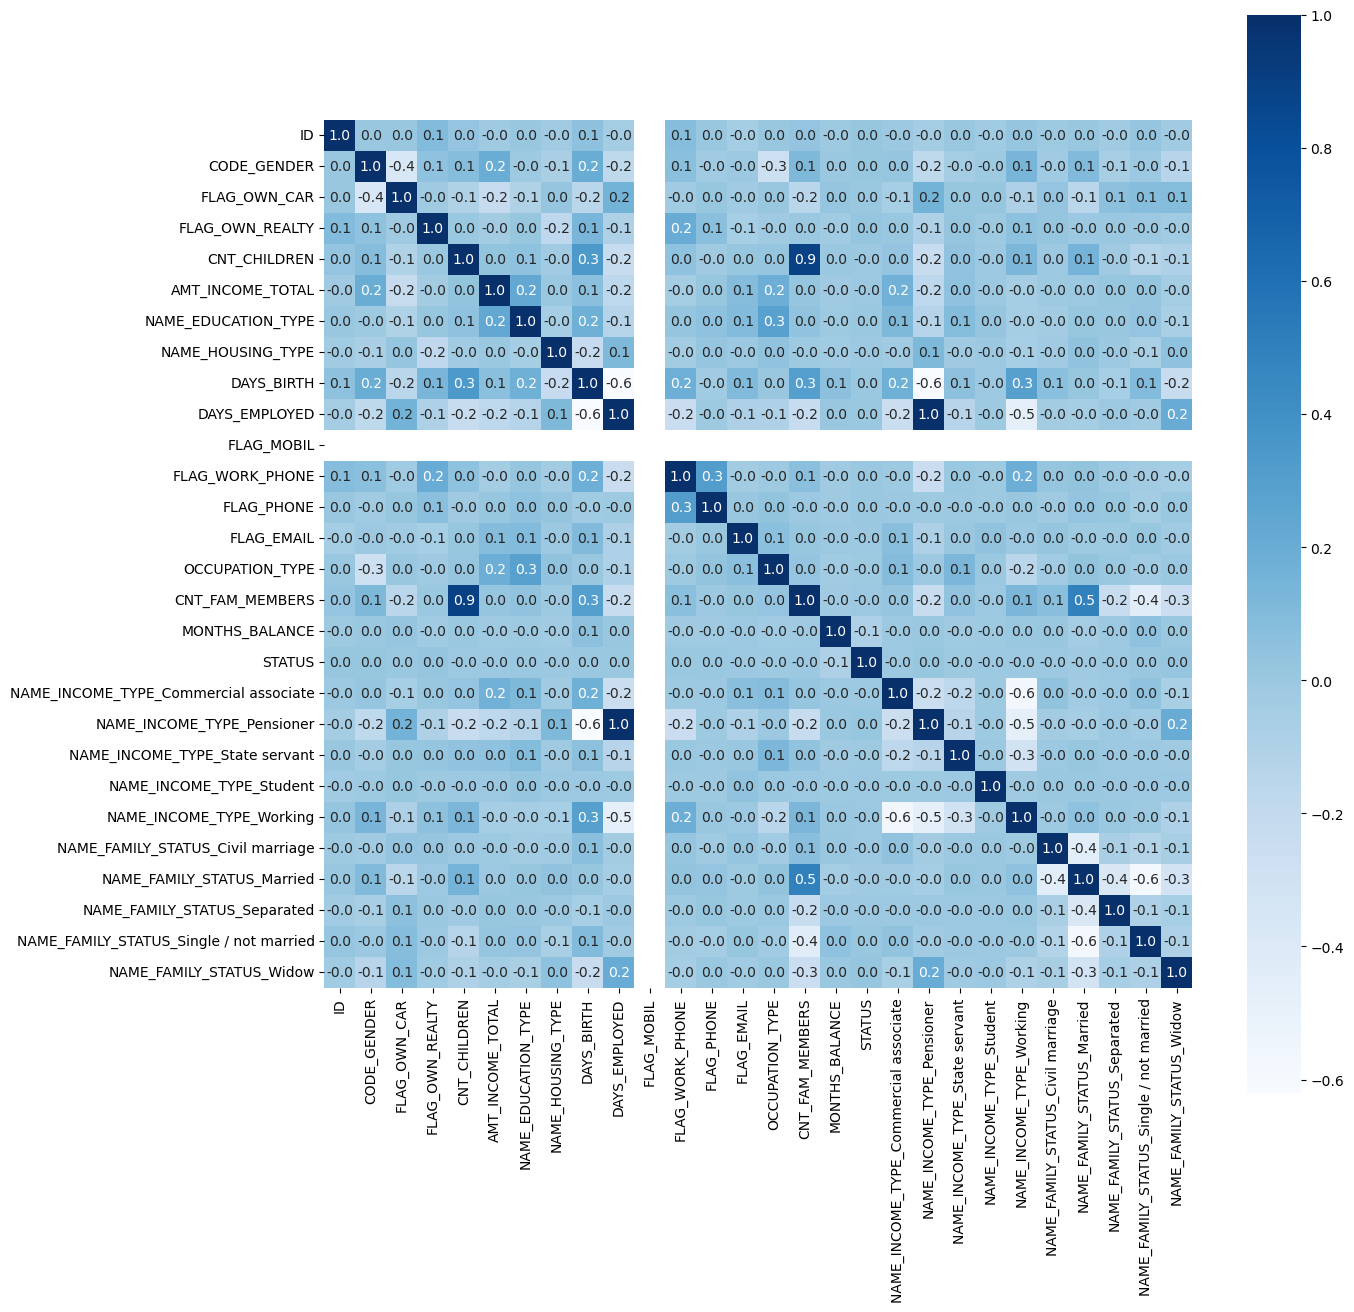

In [25]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Blues',square=True, fmt=".1f") 
plt.show()

In [9]:
data = data.drop(['FLAG_MOBIL'], axis=1)
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,5008804,1,0,0,0,427500.0,4,1,-12005,-4542,...,False,False,False,False,True,True,False,False,False,False
1,5008805,1,0,0,0,427500.0,4,1,-12005,-4542,...,False,False,False,False,True,True,False,False,False,False
2,5008806,1,0,0,0,112500.0,1,3,-21474,-1134,...,False,False,False,False,True,False,True,False,False,False
3,5008808,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
4,5008809,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,0,0,0,315000.0,1,3,-17348,-2420,...,False,False,False,False,True,False,True,False,False,False
36453,5149834,0,1,0,0,157500.0,4,3,-12387,-1325,...,True,False,False,False,False,False,True,False,False,False
36454,5149838,0,1,0,0,157500.0,4,3,-12387,-1325,...,False,True,False,False,False,False,True,False,False,False
36455,5150049,0,1,0,0,283500.0,1,3,-17958,-655,...,False,False,False,False,True,False,True,False,False,False


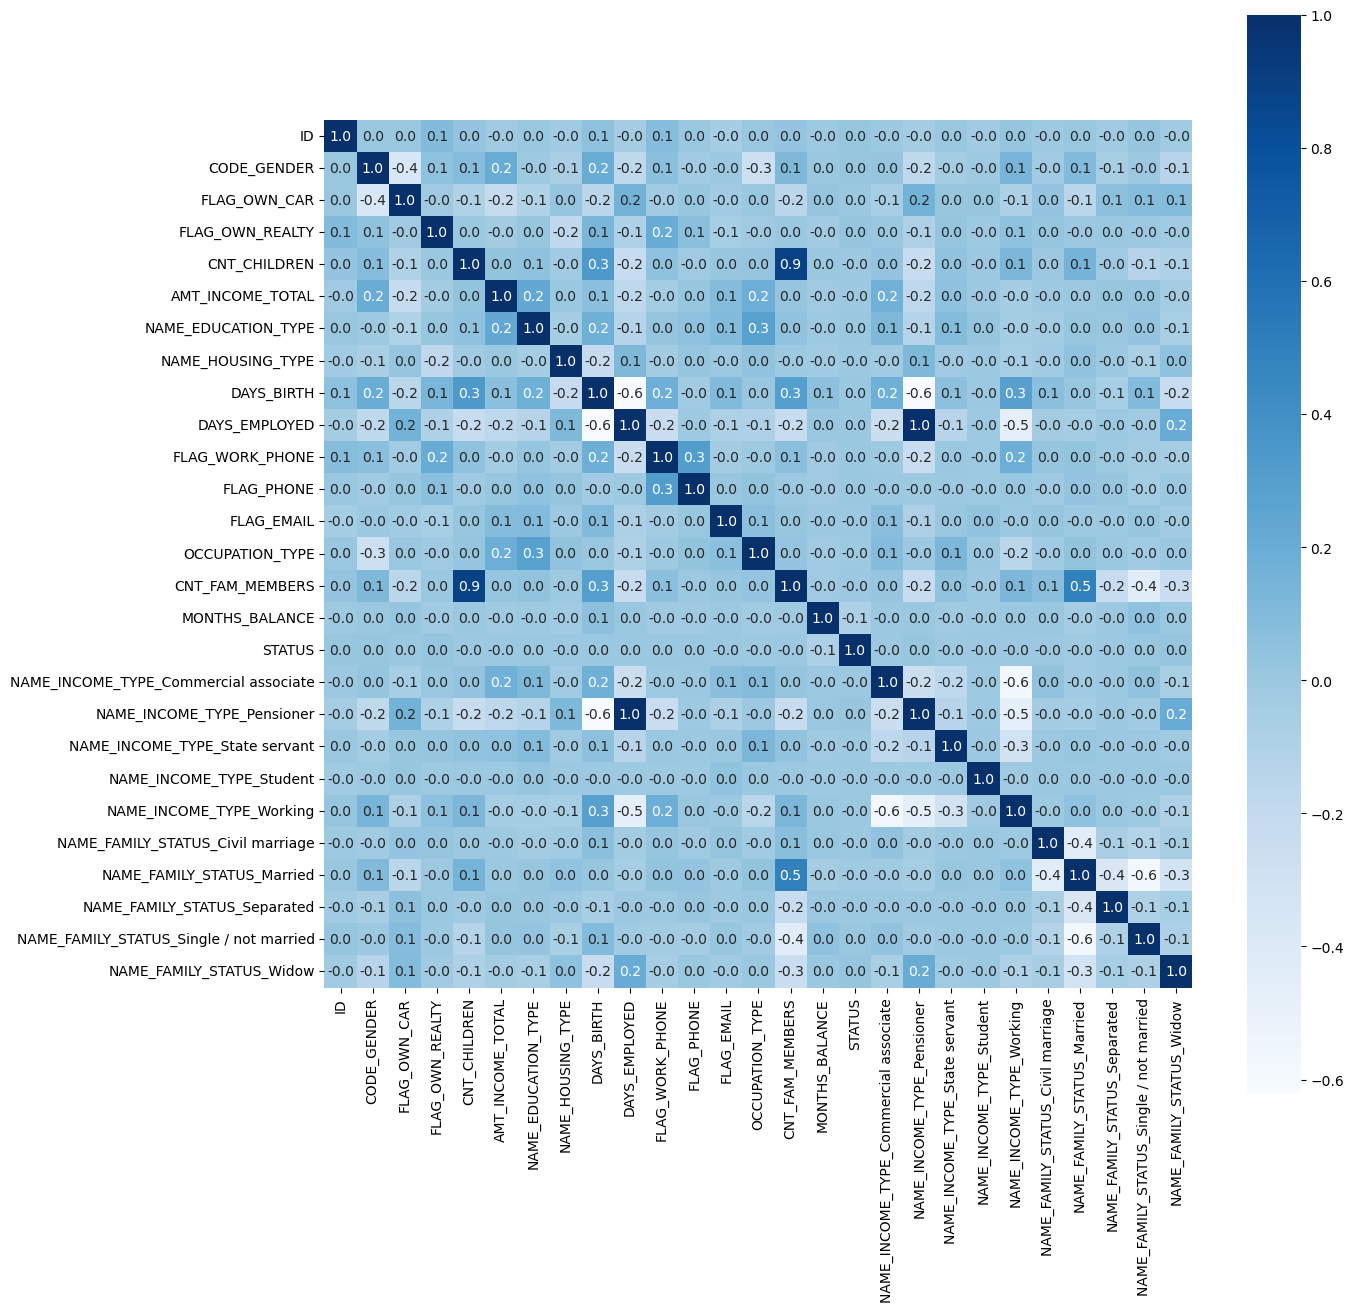

In [10]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Blues',square=True, fmt=".1f") 
plt.show()

In [26]:
data = data.dropna()
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
2,5008806,1,0,0,0,112500.0,1,3,-21474,-1134,...,False,False,False,False,True,False,True,False,False,False
3,5008808,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
4,5008809,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
5,5008810,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
6,5008811,0,1,0,0,270000.0,1,3,-19110,-3051,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,0,0,0,315000.0,1,3,-17348,-2420,...,False,False,False,False,True,False,True,False,False,False
36453,5149834,0,1,0,0,157500.0,4,3,-12387,-1325,...,True,False,False,False,False,False,True,False,False,False
36454,5149838,0,1,0,0,157500.0,4,3,-12387,-1325,...,False,True,False,False,False,False,True,False,False,False
36455,5150049,0,1,0,0,283500.0,1,3,-17958,-655,...,False,False,False,False,True,False,True,False,False,False


In [27]:
data['STATUS']

2        0
3        0
4        0
5        0
6        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: STATUS, Length: 25134, dtype: int64

In [28]:

X = data.drop(['ID','STATUS'], axis = 1)
y = data['STATUS']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
rf = RandomForestClassifier()  
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)  

In [31]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle : {accuracy}")

Précision du modèle : 0.9830913069425105


In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4946
           1       0.43      0.15      0.22        81

    accuracy                           0.98      5027
   macro avg       0.71      0.57      0.61      5027
weighted avg       0.98      0.98      0.98      5027



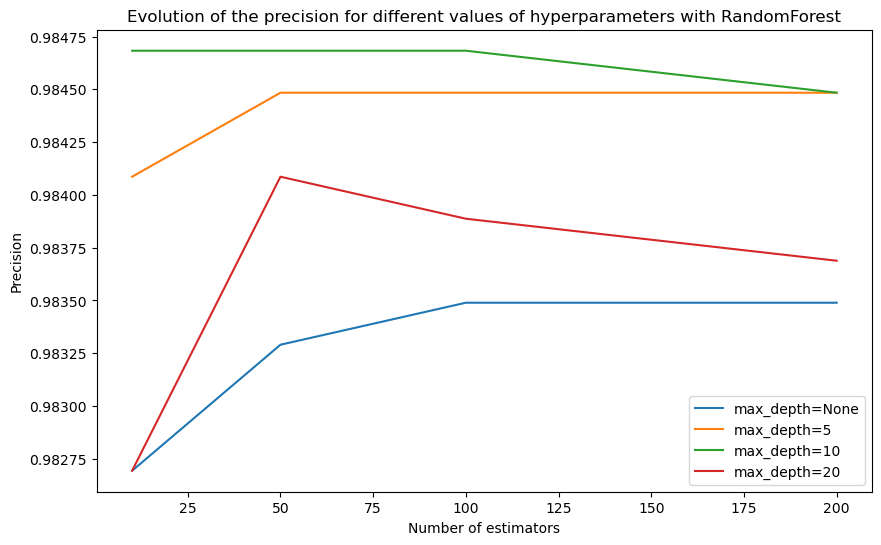

In [34]:
n_estimators_values = [10, 50, 100, 200]
max_depth_values = [None, 5, 10, 20]

plt.figure(figsize=(10, 6))
for max_depth in max_depth_values:
    accuracies = []
    for n_estimators in n_estimators_values:
        
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
       
        y_pred = model.predict(X_test)
        
      
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        

    plt.plot(n_estimators_values, accuracies, label=f'max_depth={max_depth}')


plt.xlabel('Number of estimators')
plt.ylabel('Precision')
plt.legend()
plt.title('Evolution of the precision for different values of hyperparameters with RandomForest')


plt.show()